### I got to 58%, much better than initial results, and also more consistent in cross-validation.  More could be done here, and I could certainly explore including nutritional information; however, these results are decent, considering how many features I got rid of.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [4]:
raw_data.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
raw_data['rating'].describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

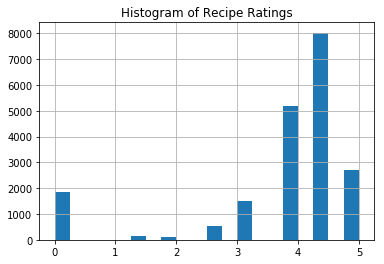

In [8]:
raw_data['rating'].hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [9]:
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [13]:
from sklearn.svm import SVR, SVC

In [10]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data['rating']
svr.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
svr.score(X, Y)

0.03856570651298896

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

### OK, time to clean up the columns and make our ratings binary; I'm going with 4 and greater as the split.

In [33]:
# just rework Y itself to be binary
Y = np.where(raw_data['rating'] >= 4, 1, 0)

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

svc = SVC()
selector = SelectKBest(svc, k=30)

### Going to use SelectKBest with a different classifier to determine my best features, then go with those in my SVC

In [38]:
selector = SelectKBest(f_classif, k = 30)
X_new = selector.fit_transform(X, Y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

           Feat_names    F_Scores
3         bon appétit  190.744223
17     house & garden  174.172453
9               drink  139.302115
0           alcoholic  120.080436
12                gin  101.773436
21              roast   93.686545
27       thanksgiving   90.665930
20        peanut free   87.444773
23           soy free   87.184921
6      cocktail party   81.261880
8              dinner   77.836218
24             spirit   65.420339
4           christmas   59.530602
2             bitters   56.374407
15     grill/barbecue   52.705988
18            low fat   48.710293
28      tree nut free   46.192361
1        backyard bbq   45.688791
10               fall   43.568286
5            cocktail   42.200029
19              pasta   37.299923
14              grill   37.010009
26  stuffing/dressing   36.201681
16      harpercollins   36.015398
22                rum   35.080134
13        goat cheese   34.103504
29              vegan   31.265497
25           stir-fry   29.510116
11       fathe

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)

In [45]:
svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('\nR-squared:')
print(svc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.59      0.25      0.35      2740
           1       0.58      0.86      0.69      3276

   micro avg       0.58      0.58      0.58      6016
   macro avg       0.59      0.55      0.52      6016
weighted avg       0.58      0.58      0.53      6016

[[ 672 2068]
 [ 458 2818]]

R-squared:
0.5801196808510638


### This cross-validation verifies my results above

In [48]:
# for grins, let's try this too
cross_val_score(svc, X_new, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

array([0.56070805, 0.57342309, 0.57417103, 0.57481297, 0.57944625])

### How about we try a grid search?

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5709401709401709, total=   6.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.5867892261650278, total=   6.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.5850790936297563, total=   6.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5611111111111111, total=   6.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5758871312526721, total=   6.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5778110303548525, total=   6.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5412393162393162, total=   6.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5476699444206926, total=   6.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5472424112868748, total=   6.2s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [53]:
# best parameters so far, I'll test a bit further; looks like I'll stay with gamma
# where it is, as it's in the middle
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [57]:
param_grid = {'C':[10, 100], 'gamma':[0.1]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, gamma=0.1 .................................................
[CV] ........ C=10, gamma=0.1, score=0.5767094017094017, total=   7.2s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.5923471569046601, total=   6.8s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.3s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.5857203933304831, total=   7.3s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.5747863247863247, total=  11.6s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.5823001282599402, total=  12.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.5756733646857631, total=  11.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 100], 'gamma': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [59]:
# looks like we already had the best parameters
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [61]:
svc = SVC(C=10, gamma=0.1)
svc.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
predictions = svc.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('\nR-squared:')
print(svc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52      2740
           1       0.61      0.66      0.63      3276

   micro avg       0.58      0.58      0.58      6016
   macro avg       0.58      0.58      0.58      6016
weighted avg       0.58      0.58      0.58      6016

[[1359 1381]
 [1117 2159]]

R-squared:
0.5847739361702128


In [63]:
# and once again -- verifies my slight increase in performance
cross_val_score(svc, X_new, Y, cv=5)

array([0.58588881, 0.58588881, 0.58588881, 0.59650873, 0.59116987])